In [1]:
import matplotlib.pyplot as plt
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms
from ase.visualize.plot import plot_atoms
from ase.build import add_adsorbate
import random


/home/ahlawat/.local/lib/python3.9/site-packages/ase/utils/geometry.py:8: UserWarning: Moved to ase.geometry and ase.build
  warnings.warn('Moved to ase.geometry and ase.build')
/home/ahlawat/.local/lib/python3.9/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')
/home/ahlawat/.local/lib/python3.9/site-packages/ase/lattice/surface.py:17: UserWarning: Moved to ase.build
  warnings.warn('Moved to ase.build')


# FASnI3 structures are taken from: 10.1021/acs.inorgchem.7b02576

### below Mn are replaced by FA

## cubic Pm-3m polymorph: https://dx.doi.org/10.5517/ccdc.csd.cc1z2dr6
- Experimental data
<ul>
<li>Space group 	P m 3 m (221)</li>
<li>Unit cell 	a 6.309610(3)Å b 6.30961Å c 6.30961Å</li>
<li>α 90.0° β 90.0° γ 90.0°</li>
<li>Cell volume 	251.19</li>
<li>Reduced cell 	a 6.310Å b 6.310Å c 6.310Å</li>
<li>α 90.000° β 90.000° γ 90.000°</li>
<li>Polymorph 	cubic Pm-3m polymorph</li>
</ul>

In [ ]:
structure = io.read('cubic.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
Mn_index = []
flag = False


while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'Mn'):
        Mn_index.append(i)
        molecule = io.read('FA.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1

del structure[Mn_index]  
FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)


### prepare vasp/quantum espresso input file

In [ ]:
write_vasp('cubic.vasp', FA_replaced_structure, vasp5=True, direct=True)

# inp_data={'prefix':"cubic",
#           'electron_maxstep':1000,
#           'outdir':"./",    
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':80.,
#           'occupations':'fixed',
#           'ecutrho':560.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"C":"C.pbe-n-rrkjus_psl.1.0.0.UPF", 
#          "H":"H.pbe-rrkjus_psl.1.0.0.UPF", 
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "N":"N.pbe-n-rrkjus_psl.1.0.0.UPF",
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("Sn_cubic.pwi", 
#          new_slab, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(1, 2, 3),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)


## tetragonal P4/mbm polymorph: https://dx.doi.org/10.5517/ccdc.csd.cc1z2dt8
- Experimental data
<ul>
<li>Space group 	P 4/m b m (127)</li>
<li>Unit cell 	    a 8.862273(7)Å b 8.862273Å c 6.248919(7)Å</li>
<li>α 90.0° β 90.0° γ 90.0°</li>
<li>Cell volume 	490.79 </li>
<li>Reduced cell 	a 6.249Å b 8.862Å c 8.862Å</li>
<li>α 90.000° β 90.000° γ 90.000°</li>
<li>Polymorph 	tetragonal P4/mbm polymorph</li>
</ul>

In [ ]:
structure = io.read('tetragonal.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
Mn_index = []
flag = False
while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'Mn'):
        Mn_index.append(i)
        molecule = io.read('FA.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1

del structure[Mn_index]  
FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)



### prepare vasp input file

In [ ]:

write_vasp('tetragonal.vasp', FA_replaced_structure, vasp5=True, direct=True)

## orthorhombic Pnma polymorph: https://dx.doi.org/10.5517/ccdc.csd.cc1z2dwb

- Experimental data
<ul>
<li>Space group 	P n m a (62)</li>
<li>Unit cell 	a 8.817491(29)Å b 12.416409(24)Å c 8.857868(32)Å</li>
<li>α 90.0° β 90.0° γ 90.0°</li>
<li>Cell volume 	969.77</li>
<li>Reduced cell 	a 8.817Å b 8.858Å c 12.416Å</li>
<li>α 90.000° β 90.000° γ 90.000°</li>
<li>Polymorph 	orthorhombic Pnma polymorph</li>
</ul>


In [ ]:
structure = io.read('ortho.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
Mn_index = []
flag = False
while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'Mn'):
        Mn_index.append(i)
        molecule = io.read('FA.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1

del structure[Mn_index]  
FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)


### prepare vasp input file

In [ ]:
write_vasp('ortho.vasp', FA_replaced_structure, vasp5=True, direct=True)

## Hexagonal polymorph of Sn not FASnI3: https://dx.doi.org/10.5517/ccdc.csd.cc1ncdw9

- Experimental data
  - Formula 	(I27 Sn9 9-)n,9n(C3 H10 N +)
  - Space group 	R 3 c (161)
  - Unit cell 	a 16.0400(4)Å b 16.0400(4)Å c 72.226(3)Å
  - α 90.00° β 90.00° γ 120.00°
  - Cell volume 	16092.85
  - Reduced cell 	a 16.040Å b 16.040Å c 25.795Å
  - α 71.886° β 71.886° γ 60.000°
  - Colour 	pale yellow

In [ ]:
structure = io.read('1530311_hex.cif')
structure = sort(structure)
view(structure)

In [ ]:
structure

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'Orthorhombic' is not interpreted for space group Spacegroup(33, setting=1). This may result in wrong setting!
  warnings.warn(


Text(0, 0.5, 'y[$\\AA$]')

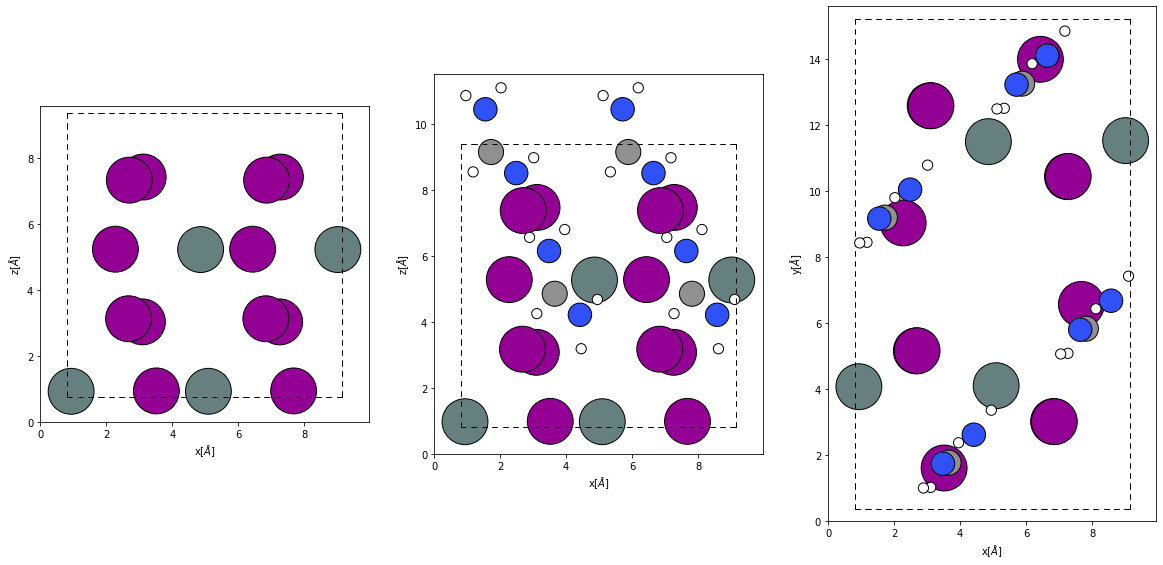

In [2]:
structure = io.read('hexa_Sn.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
del_index = []
flag = False

while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
    if(structure.get_chemical_symbols()[i] == 'H'):
        del_index.append(i)
    if(structure.get_chemical_symbols()[i] == 'N'):
        del_index.append(i)
        molecule = io.read('FA.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1

del structure[del_index]  
FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)


In [ ]:
write_vasp('hexagonal.vasp', FA_replaced_structure, vasp5=True, direct=True)

# inp_data={'prefix':"cubic",
#           'electron_maxstep':1000,
#           'outdir':"./",    
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':80.,
#           'occupations':'fixed',
#           'ecutrho':560.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"C":"C.pbe-n-rrkjus_psl.1.0.0.UPF", 
#          "H":"H.pbe-rrkjus_psl.1.0.0.UPF", 
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "N":"N.pbe-n-rrkjus_psl.1.0.0.UPF",
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("Sn_cubic.pwi", 
#          new_slab, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(1, 2, 3),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)

In [ ]:
! pip install --user spglib

In [ ]:
import spglib 

In [ ]:
lattice, scaled_positions, numbers = spglib.find_primitive(FA_replaced_structure, symprec=1e-5, angle_tolerance=-1.0)

In [ ]:
view(scaled_positions)

In [ ]:
scaled_positions